In [ ]:
# sarscov2 analysis 

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statannot import add_stat_annotation

In [ ]:
## Supp_Figure_6d_6e --- ---

In [ ]:
### sgRNA  N  --- ---

In [40]:
output = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig6/Data/subgenomic_results/'
df = pd.read_csv(output + 'subgenomic_08_N_results_window_all.txt',sep='\t') 

list_prop = list(df.WT_prop)
list_homogeneity = list(df.homogeneity)
list_corr = list(df['corr'])
print(len(list_homogeneity))

### 
windows = len(list(range(300,1360,10)))
print(windows) 

106
106


In [41]:
def plot_splash_single_region_subgenomic(regionname, start, end):

    f_center = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig6/Data/SARS-CoV2_SPLASH_B01.center"

    p_offset = 0

    def get_list_of_arcs(dotbracket, p_start, p_end):
        list_of_coords = []
        curr_list = []
        for n2, i in enumerate(dotbracket):
            if i == "(":
                curr_list.append(n2)
            elif i == ")":
                n1 = curr_list.pop(-1)
                list_of_coords.append((n1, n2))

        flt_list = []
        for s, e in list_of_coords:
            if (s >= p_start and e <= p_end):
                flt_list.append((s, e))
        return flt_list


    list_of_splash = []
    list_of_splash_count = []
    with open(f_center, "r") as f:
        for line in f:
            row = line.strip("\r\n").split("\t")
            mid1 = (int(row[1]) + int(row[2]))//2
            mid2 = (int(row[4]) + int(row[5]))//2
            count = int(row[12].split("_")[-1])


            if (mid1 >= start and mid1 <= end) or (mid2 >= start and mid2 <= end):
                list_of_splash.append((mid1-p_offset, mid2-p_offset))
                list_of_splash_count.append(count)

    p_cluster = 2
    p_length = 1654

    
    fig, ax = plt.subplots(3, 1, figsize=(20, 8), sharex=True, gridspec_kw={'height_ratios':[2,1.5,1.5]})
    plot_arcs_from_list_subgenomic(list_of_splash, list_of_counts=list_of_splash_count, p_subgenomic_start=28200, p_figax=(fig, ax[0]), p_show_count=True, p_linewidth=0.5,p_color="darkgreen")
    ax[0].set_ylabel("Splash", fontsize=20)
    ax[0].set_title(regionname, fontsize=30)


    ### 2. homogeneity curve, add the correlation and proportion curve 

    list_major_prop = [x if x >=0.5 else 1-x for x in list_prop]

    ax[1].plot(range(300+28273,1360+28273,10),list_homogeneity[0:windows], linestyle='-', marker='o', color='black', label='line with marker')
    ax[1].set_ylim(0.5,0.75)
    ax[1].set_ylabel("Homogeneity", fontsize=20)
    

    ### 5. to highlight the alternative structures
            
    ### to get the alt structures number

    # Secondary Structure
    # ---------------------

    p_length = 1654

    dict_interval = {}
    list_of_coords = []
    with open(f_center, "r") as f:
        for line in f:
            row = line.strip("\r\n").split("\t")
            mid1 = int((int(row[1])+int(row[2]))/2)
            mid2 = int((int(row[4])+int(row[5]))/2)

            if (mid1 - p_offset) >= 0 and (mid2 - p_offset) >= 0:
                list_of_coords.append((mid1-p_offset, mid2-p_offset))

                for x in range(mid1-p_offset-5, mid1-p_offset+5):
                    try:
                        dict_interval[x] += 1
                    except KeyError:
                        dict_interval[x] = 1

                for x in range(mid2-p_offset-5, mid2-p_offset+5):
                    try:
                        dict_interval[x] += 1
                    except KeyError:
                        dict_interval[x] = 1


    dict_interval   ### center of the clusters 



    list_altstruct = []

    altstruct_coords = list(np.arange(0,29844))

    for c in altstruct_coords:

        #print(c)
        
        try:
            list_altstruct.append(dict_interval[c])
        except KeyError:
            list_altstruct.append(0)


    ### df
    dict = {'altstruc': list_altstruct, 'coord': altstruct_coords} 
    df = pd.DataFrame(dict)   
    df = df.sort_values(by=['altstruc'],ascending=False)


    diff = df['altstruc'].quantile(q=0.99)
    flt = df[df['altstruc'] >=diff]
    fltt = flt[flt['coord']>=28273]
    hub = list(fltt.coord)

    ### to get the alt structures number
    
    for i in range(2):

        for j in hub:
            ax[i].axvspan(j,j+1,color=colors[1], alpha=0.1)
        
    ### draco regions from paper  
    for i in range(2):  
        ax[i].axvspan(29546, 29767, color='blue', alpha=0.1)
       
    roi_pos =    [ 28273, 29557,    29674]
    roi_labels = ["N",  "ORF10", "3' UTR"]


    ax[2].bar(roi_pos,np.ones(len(roi_pos)),color='red',width=20)
    for j in range(len(roi_pos)):
        plt.annotate(roi_labels[j],xy=(roi_pos[j],0.20+(j%4)*0.20),horizontalalignment='center',verticalalignment='center',fontsize=16,weight='bold')
    ax[2].set_xlabel("Position", fontsize=20)


    ### change ticks 
    for i in range(3):
        ax[i].tick_params(axis='both', which='major', labelsize=16) 

    dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig6/Data/'
    plt.savefig(dir_out+'Supp_Figure_6d_sgRNA_N_homogeneiety.pdf',bbox_inches='tight', dpi=300) 


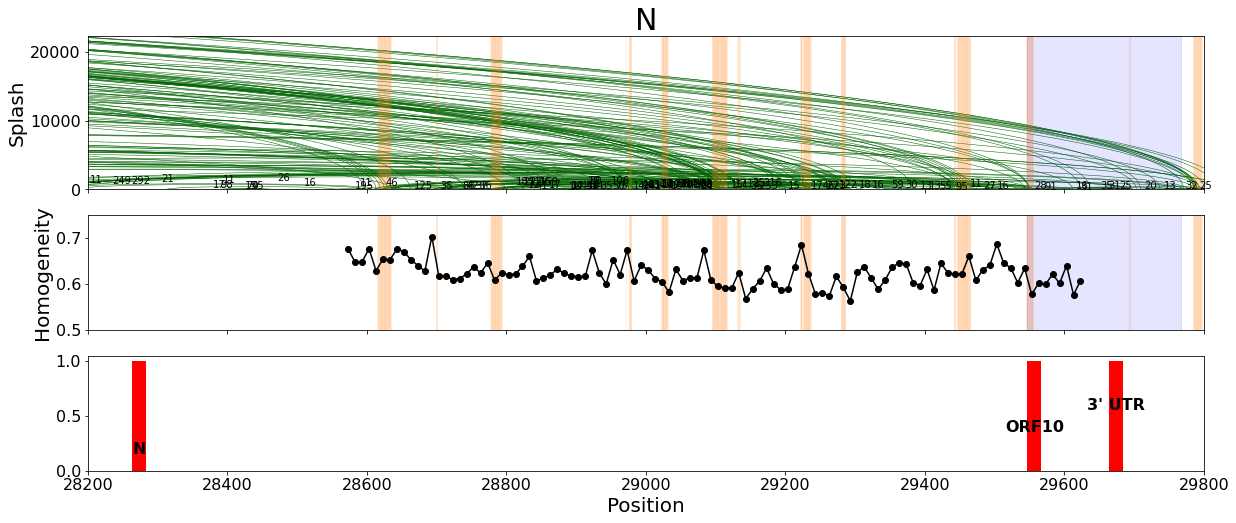

In [42]:
plot_splash_single_region_subgenomic( "N", 28273, 29927)   ## just N to end 1654

In [ ]:
### sgRNA  ORF8  ---

In [36]:
### to get the new list for plots

output = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig6/Data/subgenomic_results/'
dfall = pd.read_csv(output + 'subgenomic_07_ORF8_results_window_all.txt',sep='\t') 

list_prop = list(dfall.WT_prop)
list_homogeneity = list(dfall.homogeneity)
list_corr = list(dfall['corr'])
print(len(list_homogeneity))

### to get the windows
windows = len(list(range(300,1730,10)))
print(windows)

143
143


In [37]:
def plot_splash_single_region_subgenomic(regionname, start, end):


    f_center = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig6/Data/SARS-CoV2_SPLASH_B01.center"

    p_offset = 0

    def get_list_of_arcs(dotbracket, p_start, p_end):
        list_of_coords = []
        curr_list = []
        for n2, i in enumerate(dotbracket):
            if i == "(":
                curr_list.append(n2)
            elif i == ")":
                n1 = curr_list.pop(-1)
                list_of_coords.append((n1, n2))

        flt_list = []
        for s, e in list_of_coords:
            if (s >= p_start and e <= p_end):
                flt_list.append((s, e))
        return flt_list


    list_of_splash = []
    list_of_splash_count = []
    with open(f_center, "r") as f:
        for line in f:
            row = line.strip("\r\n").split("\t")
            mid1 = (int(row[1]) + int(row[2]))//2
            mid2 = (int(row[4]) + int(row[5]))//2
            count = int(row[12].split("_")[-1])

            if (mid1 >= start and mid1 <= end) or (mid2 >= start and mid2 <= end):
                list_of_splash.append((mid1-p_offset, mid2-p_offset))
                list_of_splash_count.append(count)

    p_cluster = 2
    p_length = 2034


    fig, ax = plt.subplots(3, 1, figsize=(20, 8), sharex=True, gridspec_kw={'height_ratios':[2,1.5,1.5]})

    plot_arcs_from_list_subgenomic(list_of_splash, list_of_counts=list_of_splash_count, p_subgenomic_start=27800, p_figax=(fig, ax[0]), p_show_count=True, p_linewidth=0.5,p_color="darkgreen")
    ax[0].set_ylabel("Splash", fontsize=20)
    ax[0].set_title(regionname, fontsize=30)

    ### 2. homogeneity curve, add the correlation and proportion curve 

    list_major_prop = [x if x >=0.5 else 1-x for x in list_prop]

    ax[1].plot(range(300+27893,1730+27893,10),list_homogeneity[0:windows], linestyle='-', marker='o', color='black', label='line with marker')
    ax[1].set_ylim(0.5,0.75)
    ax[1].set_ylabel("Homogeneity", fontsize=20)
    

    ### 5. to highlight the alternative structures
            
    ### to get the alt structures number

    # Secondary Structure
    # ---------------------

    p_length = 2034

    dict_interval = {}
    list_of_coords = []
    with open(f_center, "r") as f:
        for line in f:
            row = line.strip("\r\n").split("\t")
            mid1 = int((int(row[1])+int(row[2]))/2)
            mid2 = int((int(row[4])+int(row[5]))/2)

            if (mid1 - p_offset) >= 0 and (mid2 - p_offset) >= 0:
                list_of_coords.append((mid1-p_offset, mid2-p_offset))

                for x in range(mid1-p_offset-5, mid1-p_offset+5):
                    try:
                        dict_interval[x] += 1
                    except KeyError:
                        dict_interval[x] = 1

                for x in range(mid2-p_offset-5, mid2-p_offset+5):
                    try:
                        dict_interval[x] += 1
                    except KeyError:
                        dict_interval[x] = 1


    dict_interval   ### center of the clusters 
    

    list_altstruct = []

    altstruct_coords = list(np.arange(0,29844))

    for c in altstruct_coords:

        #print(c)
        
        try:
            list_altstruct.append(dict_interval[c])
        except KeyError:
            list_altstruct.append(0)


    ### df
    dict = {'altstruc': list_altstruct, 'coord': altstruct_coords} 
    df = pd.DataFrame(dict)   
    #print(df) 
    df = df.sort_values(by=['altstruc'],ascending=False)


    diff = df['altstruc'].quantile(q=0.99)
    flt = df[df['altstruc'] >=diff]
    fltt = flt[flt['coord']>=27893]
    hub = list(fltt.coord)

    ### to get the alt structures number
    
    for i in range(2):

        for j in hub:
            ax[i].axvspan(j,j+1,color=colors[1], alpha=0.1)
            #ax[i].tick_params(axis='both', which='major', labelsize=12)
        
    ### draco regions from paper  
    for i in range(2):  
        ax[i].axvspan(29546, 29767, color='blue', alpha=0.1)  

    ### add the sarscov2 genome
    roi_pos =    [  27893, 28273, 29557,    29674]
    roi_labels = ["ORF8","N",  "ORF10", "3' UTR"]


    ax[2].bar(roi_pos,np.ones(len(roi_pos)),color='red',width=20)
    for j in range(len(roi_pos)):
        plt.annotate(roi_labels[j],xy=(roi_pos[j],0.20+(j%4)*0.20),horizontalalignment='center',verticalalignment='center',fontsize=16,weight='bold')
    ax[2].set_xlabel("Position", fontsize=20)


    ### change ticks 
    for i in range(3):
        ax[i].tick_params(axis='both', which='major', labelsize=16) 

    dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig6/Data/'
    plt.savefig(dir_out+'Supp_Figure_6d_sgRNA_ORF8_homogeneiety.pdf',bbox_inches='tight', dpi=300) 


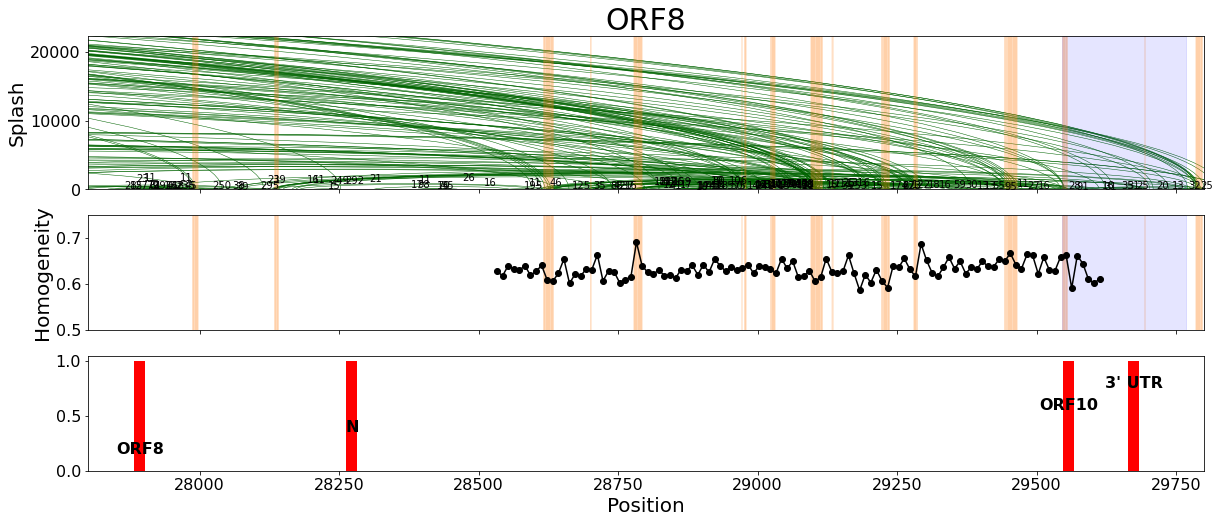

In [38]:
plot_splash_single_region_subgenomic("ORF8", 27893, 29927) 

In [ ]:
### plots for ORF7a  --------------------------------------------------------------------------------------------------

In [20]:

output = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig6/Data/subgenomic_results/'
df = pd.read_csv(output + 'subgenomic_06_ORF7a_results_window_all.txt',sep='\t') 

list_prop = list(df.WT_prop) 
list_homogeneity = list(df.homogeneity)
list_corr = list(df['corr'])
print(len(list_homogeneity))

### to get the windows
windows = len(list(range(300,2230,10)))
print(windows) 

193
193


In [21]:
def plot_splash_single_region_subgenomic(regionname, start, end):


    f_center = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig6/Data/SARS-CoV2_SPLASH_B01.center"

    p_offset = 0

    def get_list_of_arcs(dotbracket, p_start, p_end):
        list_of_coords = []
        curr_list = []
        for n2, i in enumerate(dotbracket):
            if i == "(":
                curr_list.append(n2)
            elif i == ")":
                n1 = curr_list.pop(-1)
                list_of_coords.append((n1, n2))

        flt_list = []
        for s, e in list_of_coords:
            if (s >= p_start and e <= p_end):
                flt_list.append((s, e))
        return flt_list


    list_of_splash = []
    list_of_splash_count = []
    with open(f_center, "r") as f:
        for line in f:
            row = line.strip("\r\n").split("\t")
            mid1 = (int(row[1]) + int(row[2]))//2
            mid2 = (int(row[4]) + int(row[5]))//2
            count = int(row[12].split("_")[-1])

            if (mid1 >= start and mid1 <= end) or (mid2 >= start and mid2 <= end):
                list_of_splash.append((mid1-p_offset, mid2-p_offset))
                list_of_splash_count.append(count)

    p_cluster = 2
    p_length = 2534


    fig, ax = plt.subplots(3, 1, figsize=(20, 8), sharex=True, gridspec_kw={'height_ratios':[2,1.5,1.5]})
    plot_arcs_from_list_subgenomic(list_of_splash, list_of_counts=list_of_splash_count, p_subgenomic_start=27300, p_figax=(fig, ax[0]), p_show_count=True, p_linewidth=0.5,p_color="darkgreen")
    ax[0].set_ylabel("Splash", fontsize=20)
    ax[0].set_title(regionname, fontsize=30)


    ### 2. homogeneity curve, add the correlation and proportion curve 

    list_major_prop = [x if x >=0.5 else 1-x for x in list_prop]

    ax[1].plot(range(300+27393,2230+27393,10),list_homogeneity[0:windows], linestyle='-', marker='o', color='black', label='line with marker')
    ax[1].set_ylabel("Homogeneity", fontsize=20)
    

    ### 5. to highlight the alternative structures
            
    ### to get the alt structures number

    # Secondary Structure
    # ---------------------

    p_length = 2534

    dict_interval = {}
    list_of_coords = []
    with open(f_center, "r") as f:
        for line in f:
            row = line.strip("\r\n").split("\t")
            mid1 = int((int(row[1])+int(row[2]))/2)
            mid2 = int((int(row[4])+int(row[5]))/2)

            if (mid1 - p_offset) >= 0 and (mid2 - p_offset) >= 0:
                list_of_coords.append((mid1-p_offset, mid2-p_offset))

                for x in range(mid1-p_offset-5, mid1-p_offset+5):
                    try:
                        dict_interval[x] += 1
                    except KeyError:
                        dict_interval[x] = 1

                for x in range(mid2-p_offset-5, mid2-p_offset+5):
                    try:
                        dict_interval[x] += 1
                    except KeyError:
                        dict_interval[x] = 1


    dict_interval   ### center of the clusters 
    #dict_interval.items()


    list_altstruct = []

    altstruct_coords = list(np.arange(0,29844))

    for c in altstruct_coords:

        #print(c)
        
        try:
            list_altstruct.append(dict_interval[c])
        except KeyError:
            list_altstruct.append(0)


    ### df
    dict = {'altstruc': list_altstruct, 'coord': altstruct_coords} 
    df = pd.DataFrame(dict)   
    #print(df) 
    df = df.sort_values(by=['altstruc'],ascending=False)


    diff = df['altstruc'].quantile(q=0.99)
    flt = df[df['altstruc'] >=diff]
    fltt = flt[flt['coord']>=27393]
    hub = list(fltt.coord)

    ### to get the alt structures number
    
    for i in range(2):

        for j in hub:
            ax[i].axvspan(j,j+1,color=colors[1], alpha=0.1)
            
    ### draco regions from paper  
    for i in range(2):  
        ax[i].axvspan(29546, 29767, color='blue', alpha=0.1)
        
    ### add the sarscov2 genome
    roi_pos =    [  27393,27893, 28273, 29557,    29674]
    roi_labels = [ "ORF7a","ORF8","N",  "ORF10", "3' UTR"]


    ax[2].bar(roi_pos,np.ones(len(roi_pos)),color='red',width=20)
    for j in range(len(roi_pos)):
        plt.annotate(roi_labels[j],xy=(roi_pos[j],0.20+(j%4)*0.20),horizontalalignment='center',verticalalignment='center',fontsize=16,weight='bold')
    ax[2].set_xlabel("Position", fontsize=20)


    ### change ticks 
    for i in range(3):
        ax[i].tick_params(axis='both', which='major', labelsize=16) 

    dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig6/Data/'
    plt.savefig(dir_out+'Supp_Figure_6d_sgRNA_ORF7a_homogeneiety.pdf',bbox_inches='tight', dpi=300) 


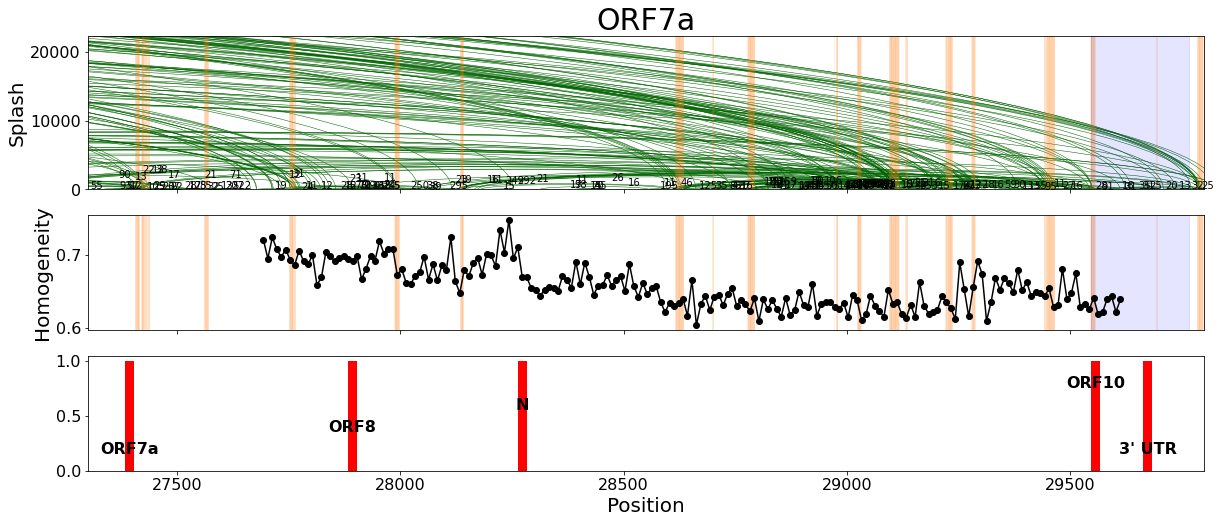

In [22]:
plot_splash_single_region_subgenomic("ORF7a", 27393, 29927)    # 2534

In [ ]:
###  Supp_Figure_6e --- ---

(106, 10)
(143, 6)
(193, 10)
(106, 10)
(106, 6)
(106, 10)
subgnomic N v.s. subgnomic ORF8: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.542e-03 U_stat=4.285e+03
subgnomic ORF8 v.s. subgnomic ORF7a: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.777e-01 U_stat=4.775e+03
subgnomic N v.s. subgnomic ORF7a: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.652e-05 U_stat=3.588e+03


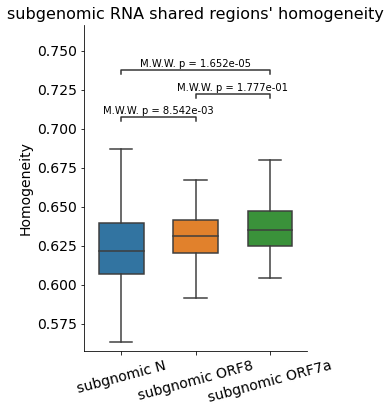

In [43]:
### plots shared region heterogenetic ---------------------

output = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig6/Data/subgenomic_results/'
df1 = pd.read_csv(output + 'subgenomic_08_N_results_window_all.txt',sep='\t') 
df2 = pd.read_csv(output + 'subgenomic_07_ORF8_results_window_all.txt',sep='\t') 
df3 = pd.read_csv(output + 'subgenomic_06_ORF7a_results_window_all.txt',sep='\t') 

df1['sub'] = 'subgnomic N'
df2['sub'] = 'subgnomic ORF8'
df3['sub'] = 'subgnomic ORF7a'

print(df1.shape)
print(df2.shape)
print(df3.shape)

df1_share = df1
df2_share = df2.tail(106)
df3_share = df3.tail(106)

print(df1_share.shape)
print(df2_share.shape)
print(df3_share.shape)


dfall = pd.concat([df1_share,df2_share,df3_share])

plt.figure(figsize = (4,6))
order = ['subgnomic N','subgnomic ORF8','subgnomic ORF7a']
g = sns.boxplot(data=dfall, x="sub", y="homogeneity", order=order, showfliers = False, dodge = False, width = 0.6) #order = order, #showfliers = False,   #palette = my_pal, , width = 1
plt.title("subgenomic RNA shared regions' homogeneity",fontsize = 16)
plt.xlabel('',fontsize = 14) 
plt.ylabel('Homogeneity',fontsize = 14)
plt.xticks(fontsize = 14,rotation=15) 
plt.yticks(fontsize = 14) 
g.spines[['right', 'top']].set_visible(False)


add_stat_annotation(g, data=dfall, x="sub", y="homogeneity",  order=order, 
                        box_pairs = [('subgnomic N','subgnomic ORF8'),
                                     ('subgnomic ORF8','subgnomic ORF7a'),
                                     ('subgnomic N', 'subgnomic ORF7a')
                                    ],
                        
                        test="Mann-Whitney", text_format='full', loc='inside', line_offset_to_box=0.01, verbose=3)

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig6/Data/'
plt.savefig(dir_out+'Supp_Figure_6e_sgRNA_homogeneiety_boxplot.pdf',bbox_inches='tight', dpi=300) 